# **Import Modules n Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filePath = 'data.csv'

In [3]:
df_raw = pd.read_csv(filePath)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   created_date            4000 non-null   object
 1   task_id                 4000 non-null   int64 
 2   customer_id             4000 non-null   int64 
 3   client_segment          4000 non-null   object
 4   type_task               4000 non-null   object
 5   flag_delivered          4000 non-null   int64 
 6   flag_inbound_call       4000 non-null   int64 
 7   flag_calculating_offer  4000 non-null   int64 
 8   calculating_channel     811 non-null    object
dtypes: int64(5), object(4)
memory usage: 281.4+ KB


In [4]:
df_raw.head()

,created_date,task_id,customer_id,client_segment,type_task,flag_delivered,flag_inbound_call,flag_calculating_offer,calculating_channel
0,3/1/2022,1,4001,TG,SMS,1,1,0,NaN
1,3/1/2022,2,4002,TG,SMS,1,1,0,NaN
2,3/1/2022,3,4003,TG,SMS,1,1,0,NaN
3,3/1/2022,4,4004,TG,SMS,1,1,0,NaN
4,3/1/2022,5,4005,TG,SMS,1,1,0,NaN


In [5]:
# check missing value 
df_raw.isnull().sum()

created_date                 0
task_id                      0
customer_id                  0
client_segment               0
type_task                    0
flag_delivered               0
flag_inbound_call            0
flag_calculating_offer       0
calculating_channel       3189
dtype: int64

In [9]:
df_raw[~df_raw['calculating_channel'].isnull()]

,created_date,task_id,customer_id,client_segment,type_task,flag_delivered,flag_inbound_call,flag_calculating_offer,calculating_channel
199,3/1/2022,200,4200,TG,SMS,1,1,1,TLS
200,3/1/2022,201,4201,TG,SMS,1,1,1,TLS
201,3/1/2022,202,4202,TG,SMS,1,1,1,TLS
202,3/1/2022,203,4203,TG,SMS,1,1,1,TLS
204,3/1/2022,205,4205,TG,SMS,1,1,1,TLS
...,...,...,...,...,...,...,...,...,...
3995,3/1/2022,3996,7996,CT,PUSH_APP,1,0,1,APP
3996,3/1/2022,3997,7997,CT,PUSH_APP,1,0,1,APP
3997,3/1/2022,3998,7998,CT,PUSH_APP,1,0,1,APP
3998,3/1/2022,3999,7999,CT,PUSH_APP,1,0,1,APP


In [10]:
# fill missing value with Unknown
df_raw['calculating_channel'].fillna('Unknown', inplace=True)
df_raw['calculating_channel'].isnull().sum()

0

# **Analysis**

In [15]:
df = df_raw.copy()

In [16]:
df['created_date'].unique()

# Bộ dữ liệu đang theo dõi chiến dịch của 1 ngày duy nhất 3/1/2022

array(['3/1/2022'], dtype=object)

In [17]:
df.describe(include='all')

# Bộ dữ liệu có 4000 dòng dữ liệu tương ứng 4000 task, theo dõi 1 ngày duy nhất 3/1/2022

,created_date,task_id,customer_id,client_segment,type_task,flag_delivered,flag_inbound_call,flag_calculating_offer,calculating_channel
count,4000,4000.000000,4000.000000,4000,4000,4000.000000,4000.00000,4000.000000,4000
unique,1,NaN,NaN,2,2,NaN,NaN,NaN,3
top,3/1/2022,NaN,NaN,CT,PUSH_APP,NaN,NaN,NaN,Unknown
freq,4000,NaN,NaN,3000,3000,NaN,NaN,NaN,3189
mean,NaN,2000.500000,6000.500000,NaN,NaN,0.986750,0.08700,0.218000,NaN
std,NaN,1154.844867,1154.844867,NaN,NaN,0.114358,0.28187,0.412939,NaN
min,NaN,1.000000,4001.000000,NaN,NaN,0.000000,0.00000,0.000000,NaN
25%,NaN,1000.750000,5000.750000,NaN,NaN,1.000000,0.00000,0.000000,NaN
50%,NaN,2000.500000,6000.500000,NaN,NaN,1.000000,0.00000,0.000000,NaN
75%,NaN,3000.250000,7000.250000,NaN,NaN,1.000000,0.00000,0.000000,NaN


In [22]:
# Number of client calculated offer
client_offer = df[df['flag_calculating_offer'] == 1]['flag_calculating_offer'].count()
print('Number of client calculated offer: ', client_offer)

Number of client calculated offer:  872


In [23]:
# Number of inbounds call
inbound_call = df[df['flag_inbound_call'] == 1]['flag_inbound_call'].count()
print('Number of inbounds call: ', inbound_call)

Number of inbounds call:  348


In [25]:
# Number of offer done by Channel
offer_channel = df[df['flag_calculating_offer']==1].groupby('calculating_channel')['flag_calculating_offer'].count().reset_index()
offer_channel

,calculating_channel,flag_calculating_offer
0,APP,750
1,TLS,61
2,Unknown,61


In [40]:
# Conversion rate for all channel
conversion_rate = client_offer / df['task_id'].count()
print('Conversion rate for all channel: {:,.2f}%'.format(conversion_rate*100))

Conversion rate for all channel: 21.80%


In [34]:
# Conversion rate by channel
conversion_rate_channel = pd.pivot_table(data = df, 
                                        index='calculating_channel', 
                                        values=['flag_calculating_offer', 'task_id'], 
                                        aggfunc={'flag_calculating_offer': np.sum, 
                                                'task_id': len}).reset_index()
conversion_rate_channel['conversion_rate'] = conversion_rate_channel['flag_calculating_offer'] / conversion_rate_channel['task_id']
conversion_rate_channel

,calculating_channel,flag_calculating_offer,task_id,conversion_rate
0,APP,750,750,1.000000
1,TLS,61,61,1.000000
2,Unknown,61,3189,0.019128


# **Visualize**

In [41]:
df_fact = pd.pivot_table(data = df,
                        index='calculating_channel',
                        values=['flag_calculating_offer', 'flag_inbound_call', 'task_id'],
                        aggfunc={'flag_calculating_offer': np.sum,
                                'flag_inbound_call': np.sum,
                                'task_id': len}).reset_index()
df_fact

,calculating_channel,flag_calculating_offer,flag_inbound_call,task_id
0,APP,750,20,750
1,TLS,61,61,61
2,Unknown,61,267,3189


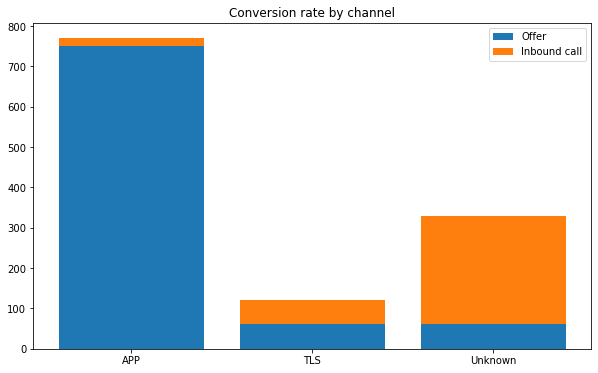

In [43]:
# stacked bar chart for conversion rate by channel
plt.figure(figsize=(10, 6))
plt.bar(df_fact['calculating_channel'], df_fact['flag_calculating_offer'], label='Offer')
plt.bar(df_fact['calculating_channel'], df_fact['flag_inbound_call'], bottom=df_fact['flag_calculating_offer'], label='Inbound call')
plt.legend()
plt.title('Conversion rate by channel')
plt.show()

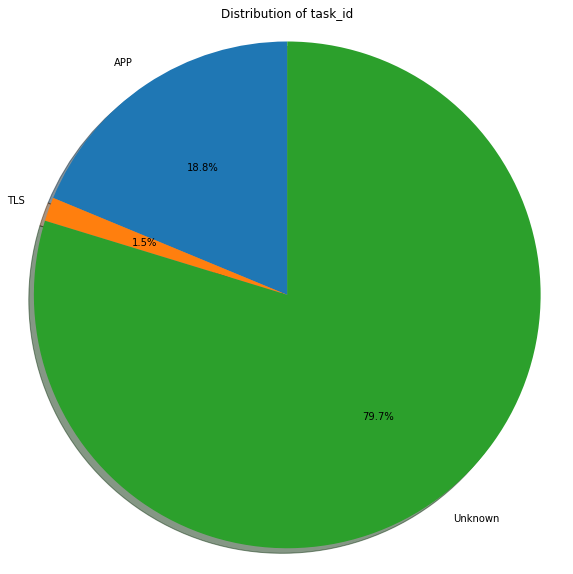

In [42]:
# piechart distribution of task by chanel
plt.figure(figsize=(10, 10))

plt.pie(df_fact['task_id'],
        labels=df_fact['calculating_channel'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.axis('equal')
plt.title('Distribution of task_id')
plt.show()